# Module 6: 'K-Means' Clustering
CS460: Machine Learning<br>
Evan Bariquit

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from scipy.spatial import distance
# The 'make_blobs' function will be used to create data.
# The 'matplotlib' library will be used to plot the data
# 'Distance' will be used to calculate Euclidean distance

X, y = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=0.5, shuffle=True, random_state=0)
# 'n_features=2' so that we can plot the data in 2D

In [1]:
# Exploring variables X and y

#print("len(X) = ", len(X))
#print(X)
#print("len(y) = ", len(y))
#print(y)

# ^ Observe that:
#     - x is a list(array) of 150 data points.
#     - y is a list(array, also 150 long) that tells you which cluster a given data point belongs to (there are 3 clusters).

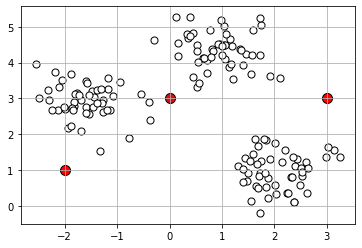

In [3]:
# Plotting the 150 points
x_values = X[:,0]
y_values = X[:,1]
plt.scatter(x_values, y_values, c='white', marker='o', edgecolor='black', s=50)
# Pick 3 random centers, which will appear as red circles
cluster_centers = [[-2,1], [0,3], [3,3]]
plt.scatter([-2,0,3], [1,3,3], c='red', marker='o', edgecolor='black', s=100)
plt.grid()
plt.show()

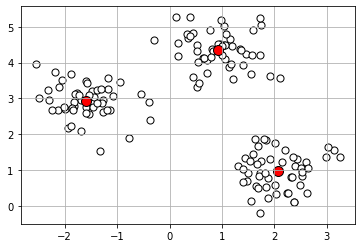

In [4]:
def reassign_datapoint(point, centers):
    distances = []
    # Calculate the distance to each centroid
    for i in range(len(centers)):
        centroid = centers[i]
        distances.append(distance.euclidean(point,centroid))
    # Return the closest one
    closest_centroid = np.argmin(distances)
    return closest_centroid

def update_centroids(points, df):
    updated_centroids = []
    clusters = []
    # Create new dataframes based on cluster labels
    for i in range(df['cluster'].nunique()):
        cluster = df.loc[df['cluster'] == i]
        clusters.append(cluster)
    # Calculate the updated locations of the centroid
    for i in range(len(clusters)):
        updated_centroid = [clusters[i]["x"].mean(), clusters[i]["y"].mean()]
        updated_centroids.append(updated_centroid)
    return updated_centroids

def find_clusters(points, labels, centers): 
    while True:
        # Assign each point to its nearest center
        for i in range(len(points)):
            datapoint = points[i]
            labels[i] = reassign_datapoint(datapoint, centers)
        # Shift the centroids
        df = pd.DataFrame({'x':points[:,0], 'y':points[:,1], 'cluster':labels})
        new_centroids = update_centroids(centers, df) 
        if np.all(centers == new_centroids):
            break
        centers = new_centroids
    return centers
    
cluster_centers = find_clusters(X, y, cluster_centers)
centroids_x = []
centroids_y = []
for centroid in cluster_centers:
    centroids_x.append(centroid[0])
    centroids_y.append(centroid[1])

# Plot the clusters and their new centers
x_values = X[:,0]
y_values = X[:,1]
plt.scatter(x_values, y_values, c='white', marker='o', edgecolor='black', s=50)
plt.scatter(centroids_x, centroids_y, c='red', marker='o', edgecolor='black', s=100)
plt.grid()
plt.show()